## Objective: Practice the use of a Decision Tree model for classification


### Import the libraries

In [116]:
"""
Import the following libraries:
- pandas
- numpy
- matplotlib

- sklearn Train and Test Split
- sklearn Tree
- sklearn Decision Tree Classifier
- sklearn Accuracy score

- the graphviz library
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import graphviz
from sklearn.tree import export_graphviz
from graphviz import Source

### Read the data in

- There are two files, one for training and one for testing. However, the test.csv file does not have the classes to be predicted. Therefore, we are not going to use that file.

- The path will depend on your Drive

In [117]:
# Create a df_train DataFrame for the train data
from google.colab import drive
drive.mount('/content/drive')
df_train = pd.read_csv('/content/drive/My Drive/train.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
# print the first 5 rows of df_train
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [119]:
# Show the description of df_train
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


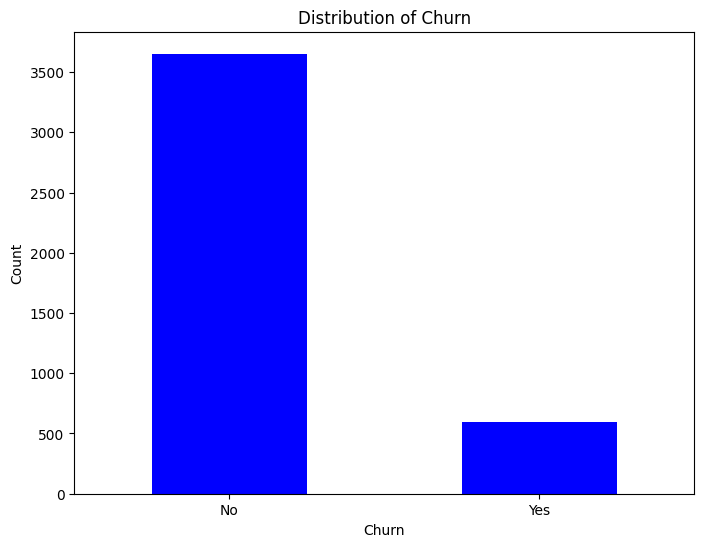

In [120]:
# Plot the distribution of the target feature 'churn'
plt.figure(figsize=(8, 6))
df_train['churn'].value_counts().plot(kind='bar', color=['blue', 'blue'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()


#### The classes are really imbalanced. You can take care of that later.

### Let's get our Xs and ys

In [121]:
# Create X based on our df_train
X = df_train.drop('churn', axis=1)

# Create y based on our df_train
y = df_train['churn']

In [122]:
# Show the first five rows of X
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [123]:
# Show the size of X
X.shape

(4250, 19)

### Before we continue. We need to address an issue with our data.

Decision Trees should handle numerical and catergorical data. However, the scikit-learn implementation does not support categorical variables for now.
https://scikit-learn.org/stable/modules/tree.html

Then, we need to handle this issue.


### Let's use the `get_dummies` method from Pandas to get the one-hot-encoder for these variables

In [124]:
# Get a new dataset as result of the get_dummies method applied to the
# categorical variables 'state','area_code','international_plan','voice_mail_plan'
# similarly, use the parameter drop_first=True.
# this parameter is used to avoid multicollinearity, a situation where one
#predictor variable in a regression model can be predicted from the others.
cat_columns = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
X_encoded = pd.get_dummies(X, columns=cat_columns, drop_first=True)
X_encoded['state_VA'] = X_encoded['state_VA'].astype(int)
X_encoded['state_VT'] = X_encoded['state_VT'].astype(int)
X_encoded['state_WA'] = X_encoded['state_WA'].astype(int)
X_encoded['state_WI'] = X_encoded['state_WI'].astype(int)
X_encoded['state_WV'] = X_encoded['state_WV'].astype(int)
X_encoded['state_WY'] = X_encoded['state_WY'].astype(int)
X_encoded['area_code_area_code_415'] = X_encoded['area_code_area_code_415'].astype(int)
X_encoded['area_code_area_code_510'] = X_encoded['area_code_area_code_510'].astype(int)
X_encoded['international_plan_yes'] = X_encoded['international_plan_yes'].astype(int)
X_encoded['voice_mail_plan_yes'] = X_encoded['voice_mail_plan_yes'].astype(int)

In [125]:
# Show the first 5 rows for this new dataset
X_encoded.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,0,0,0,0,0,0,0,1,0,1


In [126]:
# Show the new size of the new X
X_encoded.shape

(4250, 69)

### We have a new DataFrame with numeric values instead of categorical values. However, we need to join this new DataFrame with the original data containing the non-categorical columns.

In [127]:
# From our original DataFrame we need to remove the original categorical columns
X_without_cats = X.drop(cat_columns, axis=1)


In [128]:
# Show the first five rows
X_without_cats.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [129]:
# Store the column names from the previous dataframe, you will use them later
column_names = X_without_cats.columns.tolist()
# print the column names
column_names

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [130]:
# Then we need to join the two created DataFrames using the .join() method
# Your datsaframe without the categorical variables and the dataframe with the
# dummy variables
common_columns = X_without_cats.columns.intersection(X_encoded.columns)
X_encoded_drop_common = X_encoded.drop(common_columns, axis=1)

X_combined = X_without_cats.join(X_encoded_drop_common)



In [131]:
# Show the first five rows of the joined dataframe
X_combined.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,0,0,0,0,0,0,0,1,0,1


#### Wow! we have more columns. But all numerica now.

In [132]:
# Split this dataframe into train and test sets.
# Use a 80/20 split ratio and a random state of 42
X_train, X_test = train_test_split(X_combined, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

In [133]:
# Print the sizes
# X_train
print(X_train.shape)
# y_train
print(y_train.shape)
# X_test
print(X_test.shape)
# y_test
print(y_test.shape)

(3400, 69)
(3400,)
(850, 69)
(850,)


### Create a base Decision Tree Classifier.


In [134]:
# Create a base Decision Tree classifier, use the random state of 42 as parameter
base_dt_classifier = DecisionTreeClassifier(random_state=42)

In [135]:
# show the classifier
base_dt_classifier

DecisionTreeClassifier(random_state=42)

### Train the classifier using the training data

In [136]:
# Train the model using X_train and y_train
base_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Make predictions on our Test data

In [137]:
# Get predictions using our model with the X_test data
y_pred = base_dt_classifier.predict(X_test)
# Compute the testing score for the accuracy
testing_accuracy = accuracy_score(y_test, y_pred)
# print the accuracy score for the test data
print("Test Score:", round(testing_accuracy,4))

Test Score: 0.9082


## Let's try to improve our model

One of the main causes of overfitting decision tree is depth of the tree. Decision trees can overfit the data when they grow too deep and capture too many details. To prevent this, we can use the max-depth hyperparameter of DecisionTreeClassifier to limit the depth of the tree.

In [138]:
# Create a new DT classifier with depth = 5 and random state of 42
dt_classifier_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

In [139]:
# Train the model using X_train and y_train
dt_classifier_depth_5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [140]:
# Get predictions using our model with the X_test dataa
y_pred_depth_5 = dt_classifier_depth_5.predict(X_test)
# Compute the testing score for the accuracy
testing_accuracy_depth_5 = accuracy_score(y_test, y_pred_depth_5)
# print the accuracy score for the test data
print("Test Score:", round(testing_accuracy_depth_5,4))

Test Score: 0.9224


#### We improved our model!

Limiting the depth of the tree will decrease overfitting. When we set the depth of the tree to 5 in the above classifier.

### Let's try another change

The minimum number of samples a node must have before it can be split. It can be an integer or a float. To avoid overfitting, we should choose a value that is not too small.

In [141]:
# Create a new DT classifier with depth = 10, min_samples_aplit= 30, and random state of 42
dt_classifier_depth_10 = DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=42)

In [142]:
# Train the model using X_train and y_train
dt_classifier_depth_10.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=42)

In [143]:
# Get predictions using our model with the X_test dataa
y_pred_depth_10 = dt_classifier_depth_10.predict(X_test)
# Compute the testing score for the accuracy
testing_accuracy_depth_10 = accuracy_score(y_test, y_pred_depth_10)
# print the accuracy score for the test data
print("Test Score:", round(testing_accuracy_depth_10,4))

Test Score: 0.9329


### Nice! We improved it more.

### Let's try one more parameter

This parameter specifies the smallest number of samples that a leaf node can contain.

In [144]:
# Create a classifier with depth = 10, min_samples_split= 30,
# min_samples_leaf=2, and random state of 42
dt_classifier_params = DecisionTreeClassifier(max_depth=10, min_samples_split=30,
                                              min_samples_leaf=2, random_state=42)

In [145]:
# Train the model using X_train and y_train
dt_classifier_params.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=30,
                       random_state=42)

In [146]:
# Get predictions using our model with the X_test dataa
y_pred_params = dt_classifier_params.predict(X_test)
# Compute the testing score for the accuracy
testing_accuracy_params = accuracy_score(y_test, y_pred_params)
# print the accuracy score for the test data
print("Test Score:", round(testing_accuracy_params,4))

Test Score: 0.9376


### Did we improved it? Yes, no, the same?

If it didn't improve, what would you think you could do?
- Do more data preprocessing (i.e., standardization)?
- Use grid search?
- play with other parameters? (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### Let's visualize our tree

#### We can use the `graphviz` library to show our decision tree

https://graphviz.gitlab.io/

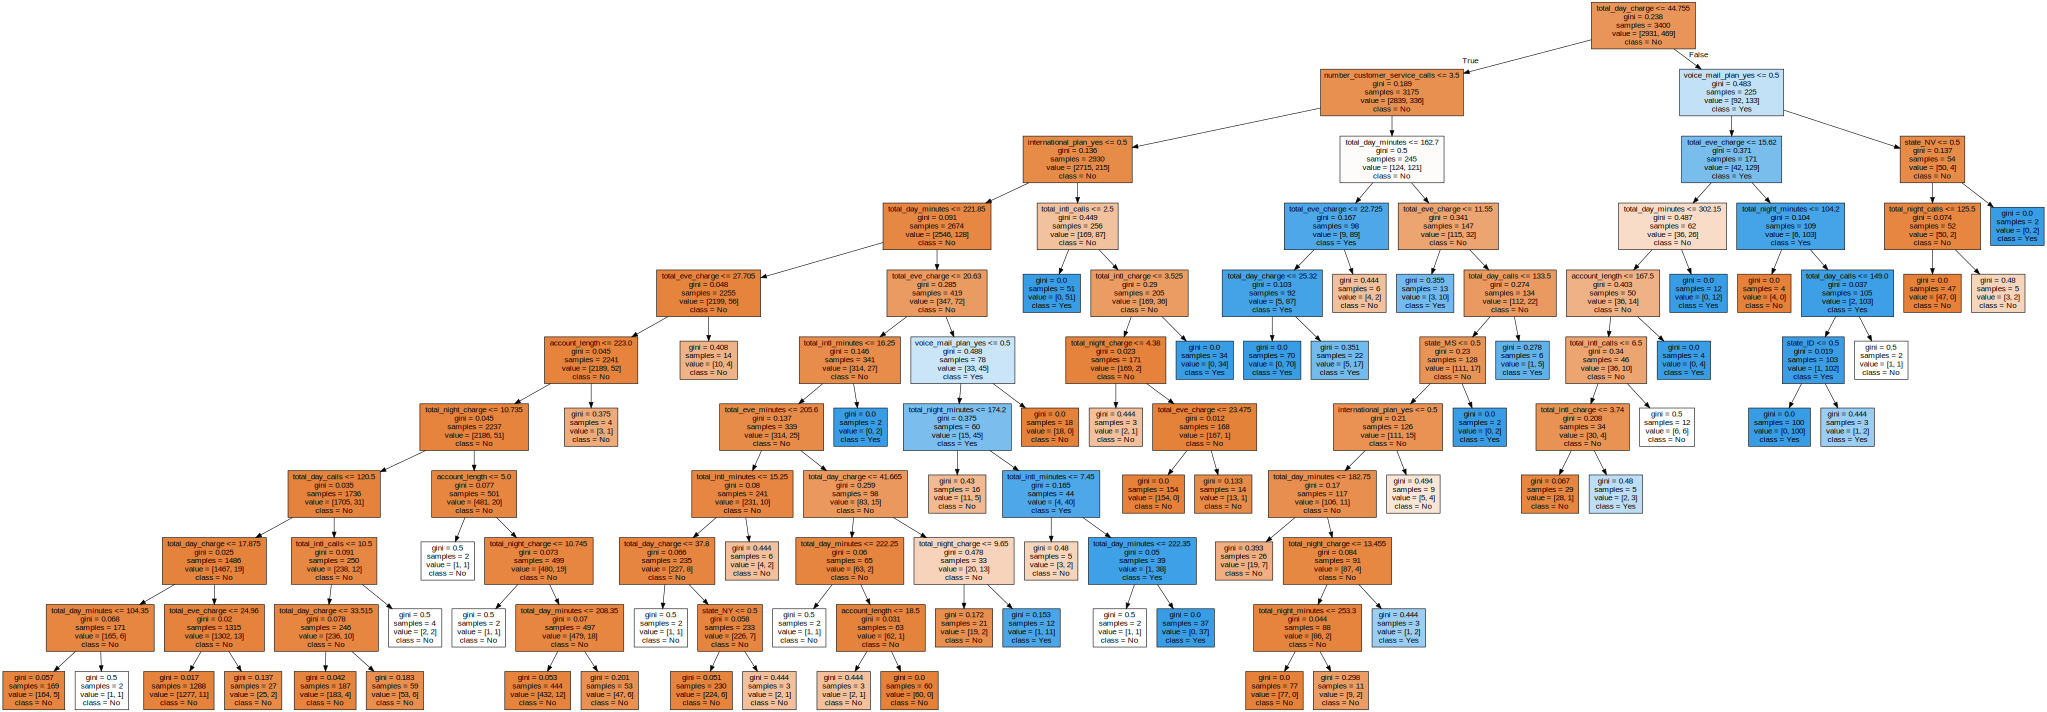

In [149]:
# Let's visualize our last DT model
# Follow the instructions frolm the above URL to print your Tree
# My slides also have an example for this
export_graphviz(dt_classifier_params, out_file="dt_train_tree.dot",
                feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)

# Display the decision tree plot in Colab
plt.show()
Source.from_file("dt_train_tree.dot")

In [150]:
# Export the plot to a PDF file
# For example: graph.render("decision_tree_plot", format="pdf")  # Export to PDF file
Source.from_file("dt_train_tree.dot").render("decision_tree_plot", format="pdf")

'decision_tree_plot.pdf'

# We are done with this excercise